In [2]:
!pip install seaborn
!pip install folium

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [8]:
df.head()

Region      Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0    NSW  1/4/2005              8.68000                      312.266667   
1    NSW  1/5/2005             16.61125                      322.475000   
2    NSW  1/6/2005              5.52000                      325.266667   
3    NSW  1/7/2005              6.26400                      313.870000   
4    NSW  1/8/2005              5.40000                      337.383333   

   Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
0                            42.400000        78.666667        2.886751   
1                            62.362500        85.500000        8.088793   
2                            38.400000        78.333333        3.214550   
3                            33.800000        92.200000        7.529940   
4                           122.533333        91.000000        7.937254   

   Var_confidence  Count Replaced  
0        8.333333      3        R  
1       65.428571      8        R  
2       10.333333      3        R  
3       56.700000      5        R  
4       63.000000      3        R

In [9]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [11]:
df.shape

(26406, 10)

In [12]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [13]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [14]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [15]:
    ##TASK 1.1: Let's try to understand the change in average estimated fire area over time
    plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby('Year')['Estimated_fire_area'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()

In [16]:
    ##TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.
    # Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year, Month')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()

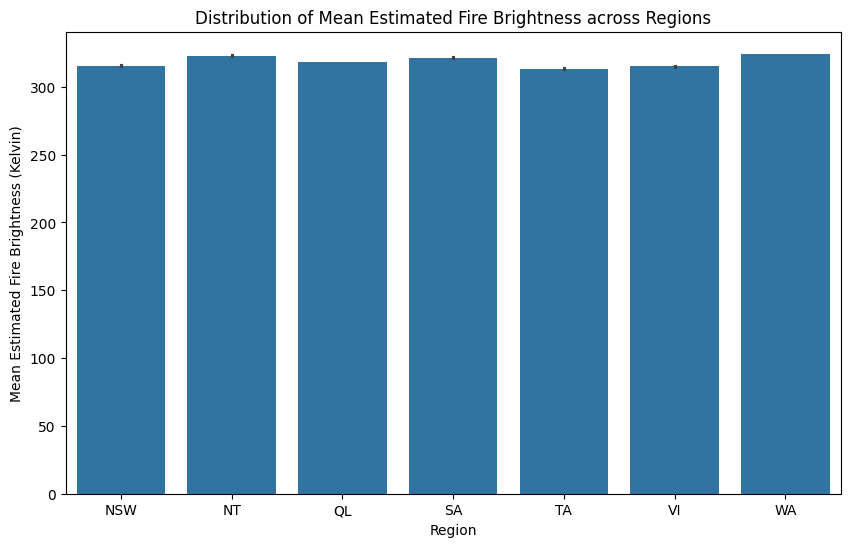

In [17]:
##TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions
df['Region'].unique()
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [18]:
##TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

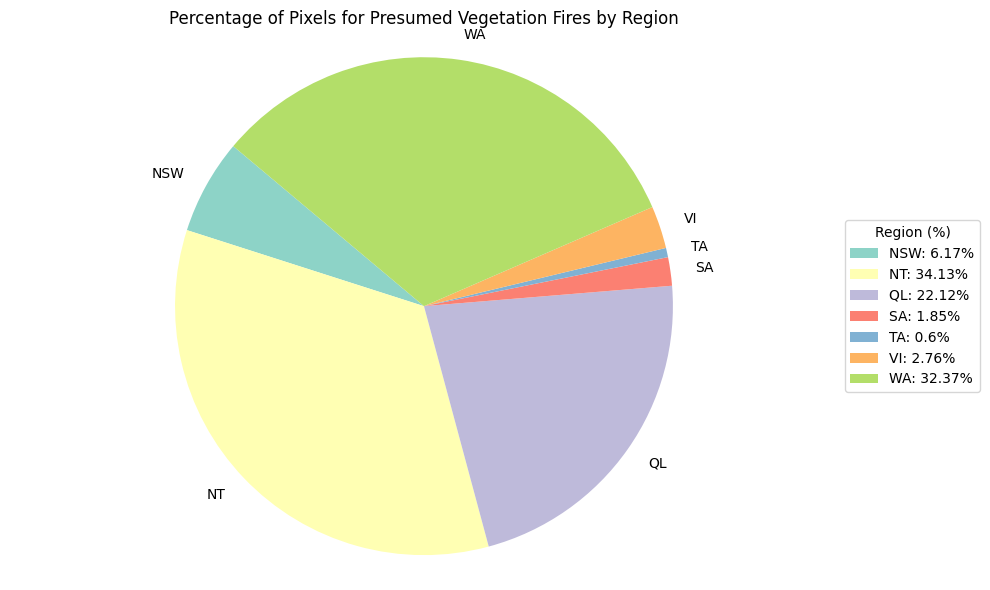

In [19]:
##TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI
import matplotlib.pyplot as plt

# Group the data by Region and sum the 'Count' values
region_counts = df.groupby('Region')['Count'].sum()

# Create the pie chart without autopct
plt.figure(figsize=(10, 6))
plt.pie(region_counts, 
        labels=region_counts.index, 
        startangle=140, 
        colors=plt.cm.Set3.colors)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')  # Ensures the pie chart is circular

# Generate legend with percentage values
percentages = [(i, round(k / region_counts.sum() * 100, 2)) for i, k in zip(region_counts.index, region_counts)]
legend_labels = [f"{region}: {pct}%" for region, pct in percentages]
plt.legend(legend_labels, title="Region (%)", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


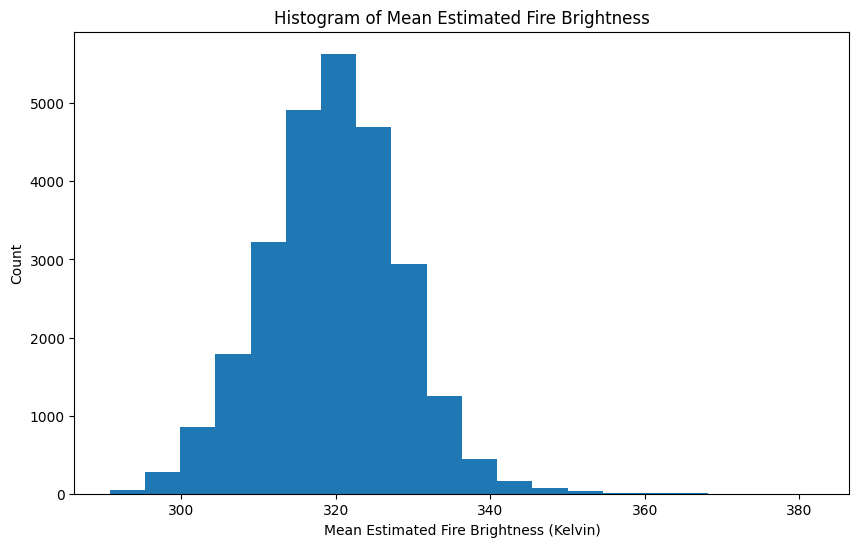

In [21]:
##TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness
import matplotlib.pyplot as plt
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()


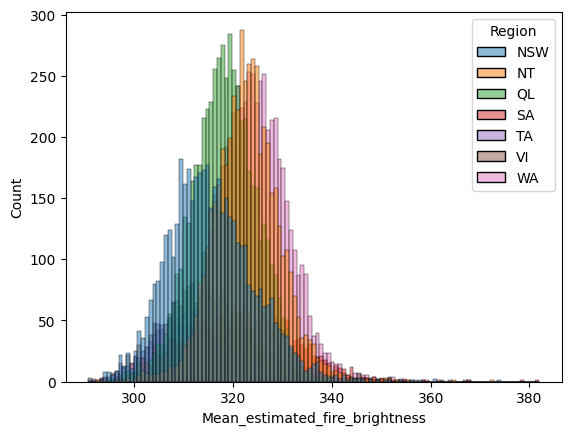

In [22]:
##TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions?
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

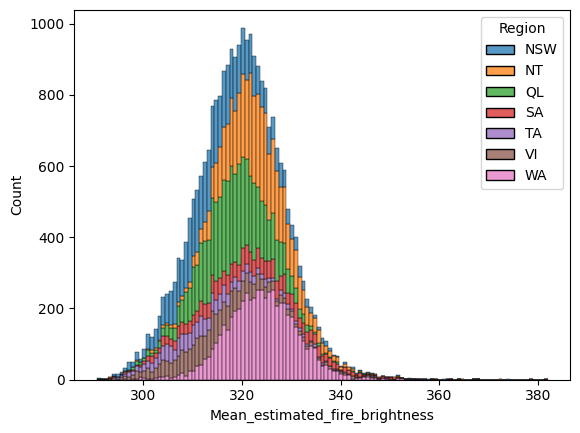

In [23]:
##Include the parameter
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

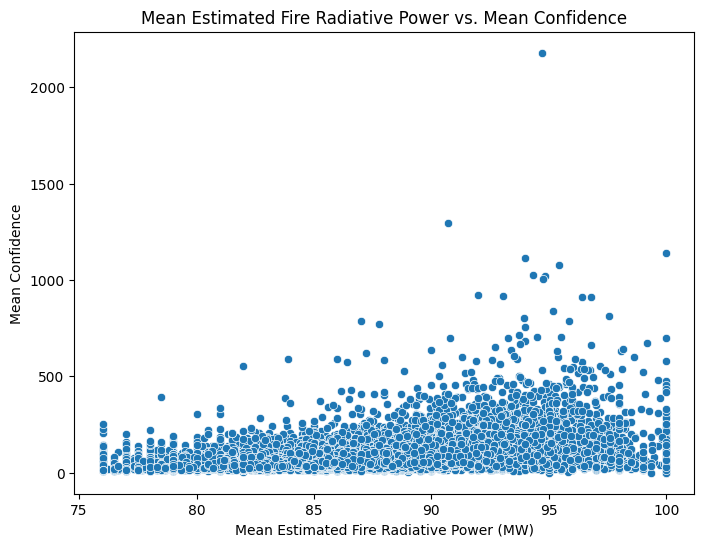

In [25]:
    ##TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?
     # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
    plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
    sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
    plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
    plt.ylabel('Mean Confidence')
    plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
    plt.show()

In [26]:
##TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium¶
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg


region        Lat         Lon
0    NSW -31.875984  147.286949
1     QL -22.164678  144.584490
2     SA -30.534367  135.630121
3     TA -42.035067  146.636689
4     VI -36.598610  144.678005
5     WA -25.230300  121.018725
6     NT -19.491411  132.550964

In [27]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

In [32]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Create app
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True

# Load data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

# Extract year and month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Layout
app.layout = html.Div(children=[
    html.H1('Australia Wildfire Dashboard',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 26}),
    
    html.Div([
        html.Div([
            html.H2('Select Region:', style={'margin-right': '2em'}),
            dcc.RadioItems(['NSW', 'QL', 'SA', 'TA', 'VI', 'WA'],
                           value='NSW',
                           id='region',
                           inline=True)
        ]),
        
        html.Div([
            html.H2('Select Year:', style={'margin-right': '2em'}),
            dcc.Dropdown(df.Year.unique(), value=2005, id='year')
        ]),

        html.Div([
            html.Div([], id='plot1', style={'width': '50%'}),
            html.Div([], id='plot2', style={'width': '50%'})
        ], style={'display': 'flex'})
    ])
])

# Callback
@app.callback([Output('plot1', 'children'),
               Output('plot2', 'children')],
              [Input('region', 'value'),
               Input('year', 'value')])
def reg_year_display(input_region, input_year):
    region_data = df[df['Region'] == input_region]
    y_r_data = region_data[region_data['Year'] == input_year]

    # Plot 1: Monthly Average Estimated Fire Area
    est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
    fig1 = px.pie(est_data,
                  values='Estimated_fire_area',
                  names='Month',
                  title="{}: Monthly Avg. Estimated Fire Area in {}".format(input_region, input_year))

    # Plot 2: Monthly Average Count of Pixels for Presumed Vegetation Fires
    veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
    fig2 = px.bar(veg_data,
                  x='Month',
                  y='Count',
                  title="{}: Avg. Count of Pixels for Presumed Vegetation Fires in {}".format(input_region, input_year))

    return [dcc.Graph(figure=fig1), dcc.Graph(figure=fig2)]

# Run app
if __name__ == '__main__':
    app.run(port=8051, debug=True)



In [33]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt
#Create app
app = dash.Dash(__name__)
#Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True
# Read the wildfire data into pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
#Extract year and month from the date column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name() #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year
#Layout Section of Dash
#Task 1 Add the Title to the Dashboard
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),
# TASK 2: Add the radio items and a dropdown right below the first inner division
     #outer division starts
     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),

                    #Radio items to select the region
                    #dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),
#TASK 3: Add two empty divisions for output inside the next inner division. 
         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([
                
                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),

    ])
    #outer division ends

])
#layout ends
#TASK 4: Add the Ouput and input components inside the app.callback decorator.
#Place to add @app.callback Decorator
@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])
#TASK 5: Add the callback function.   
#Place to define the callback function .
def reg_year_display(input_region,input_year):  
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area   
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))   
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))    
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]
if __name__ == '__main__':
    app.run(port=8051, debug=True)
    